In [92]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime

with open('fcg.json') as f:
    fcg_df = pd.DataFrame(json.load(f))
    fcg_df['security'] = 'FCG (internal market)'

# https://www.nzx.com/statistics/FSF/interday.json
with open('fsf.json') as f:
    fsf_df = pd.DataFrame(json.load(f))
    fsf_df['security'] = 'FSF (NZX-listed)'

all_prices = pd.concat([fcg_df, fsf_df])

numbers = ['open_price', 'high_price', 'low_price', 'close_price']
all_prices[numbers] = all_prices[numbers].apply(pd.to_numeric)
all_prices['date'] = pd.to_datetime(all_prices['date'])
all_prices['security'] = all_prices['security'].astype('string')


Text(0.5, 0.98, 'Price of NZX-listed Fonterra units vs Fonterra farmer-shares')

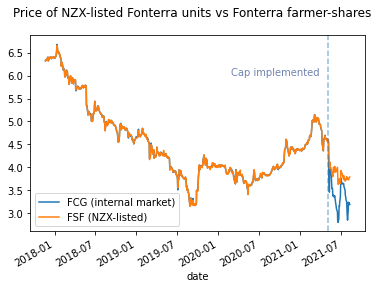

In [93]:
fig, ax = plt.subplots()
for label, grp in all_prices.groupby('security'):
    grp.plot(x = 'date', y = 'close_price',ax = ax, label = label)

x_line_annotation = datetime.datetime(2021, 5, 6)
x_text_annotation = datetime.datetime(2020, 2, 28)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5)
ax.text(x=x_text_annotation, y=6, s='Cap implemented', alpha=0.7, color='#334f8d')

fig.suptitle("Price of NZX-listed Fonterra units vs Fonterra farmer-shares")

aall_prices.plot(x='date', y='close_price', c='security')


<AxesSubplot:xlabel='date'>

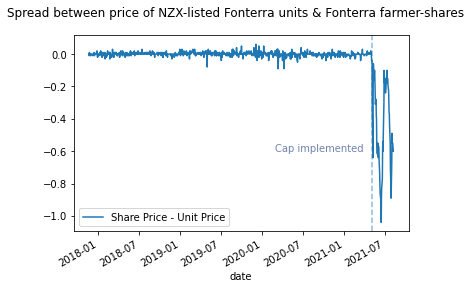

In [94]:
wide = all_prices.pivot(index='date', 
                        columns='security', 
                        values=['close_price'])

wide['Share Price less Unit Price'] = wide['close_price']['FCG (internal market)']-wide['close_price']['FSF (NZX-listed)']

fig, ax = plt.subplots()
fig.suptitle("Spread between price of NZX-listed Fonterra units & Fonterra farmer-shares")

x_line_annotation = datetime.datetime(2021, 5, 6)
x_text_annotation = datetime.datetime(2020, 2, 28)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5)
ax.text(x=x_text_annotation, y=-0.6, s='Cap implemented', alpha=0.7, color='#334f8d')


wide.plot(y='Share Price less Unit Price', ax=ax)

In [95]:
wide

close_price                  Share Price - Unit Price
security   FCG (internal market) FSF (NZX-listed)                         
date                                                                      
2017-11-21              6.320001         6.319997                 0.000005
2017-11-22              6.330004         6.339995                -0.009991
2017-11-23              6.340001         6.329998                 0.010003
2017-11-24              6.340001         6.339995                 0.000006
2017-11-27              6.350004         6.349997                 0.000007
...                          ...              ...                      ...
2021-08-03              3.240003         3.729996                -0.489994
2021-08-04              3.200003         3.739998                -0.539995
2021-08-05              3.190000         3.739998                -0.549998
2021-08-06              3.230000         3.780000                -0.550000
2021-08-09              3.190000         3.790000                -0.600000

[931 rows x 3 columns]